In [28]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [91]:
traj = md.load('./NaCl_center.xtc', top='./NaCl_topol.gro')

In [92]:
oxygen_h2o = traj.topology.select('water and name O')
sodium = traj.topology.select('name SOD')
chlorine = traj.topology.select('name CLA')

In [111]:
def calc_msd(atoms):
    msds = []
    init_pos = traj.xyz[0, atoms, :]
    for i in range(traj.n_frames):
        cur_pos = traj.xyz[i, atoms, :]
        cur_msd = np.sum((cur_pos - init_pos)**2) / len(atoms)
        msds.append(cur_msd)
        
    return msds

In [112]:
msds_oxygen_h2o = calc_msd(oxygen_h2o)
msds_sodium = calc_msd(sodium)
msds_chlorine = calc_msd(chlorine)

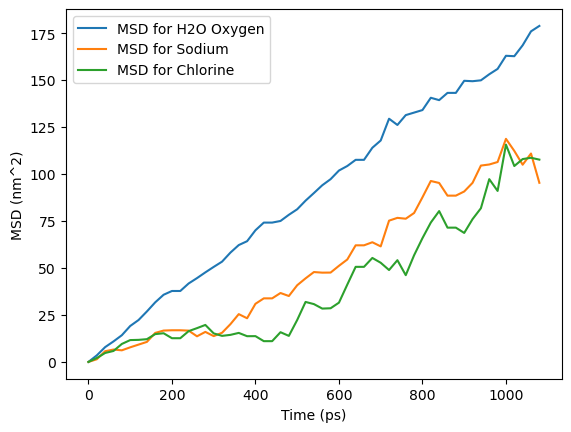

In [115]:
x = [i * 10 * 2 for i in range(traj.n_frames)]
plt.plot(x, msds_oxygen_h2o, label = "MSD for H2O Oxygen")
plt.plot(x, msds_sodium, label = "MSD for Sodium")
plt.plot(x, msds_chlorine, label = "MSD for Chlorine")
plt.ylabel("MSD (nm^2)")
plt.xlabel("Time (ps)")
plt.legend()
plt.savefig('./NaCl_msd.png')
plt.show()